## Intermediate Stat

#### Normal Distribution / Gaussian Distribution

In [1]:
# Libraires

import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [2]:
# Load data

df = pd.read_csv('data/Wine-quality-challenge.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: ylabel='Density'>

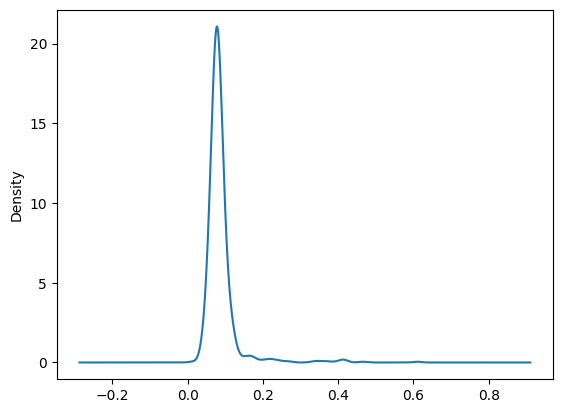

In [3]:
# Normal Distribution

## Density Plot of Chlorides

df.chlorides.plot.density()

In [4]:
# Check the number of observations within X standard deviations 

def find_percentage_dist(data,column,deviation_no):
    print(data.loc[(data[column] <= data[column].mean() + deviation_no * data[column].std()) &
             (data[column] >= data[column].mean() - deviation_no * data[column].std())][column].count() / data[column].count())

In [5]:
find_percentage_dist(df,"chlorides",1)

0.9480925578486554


In [6]:
find_percentage_dist(df,"chlorides",2)

0.9718574108818011


In [7]:
find_percentage_dist(df,"chlorides",3)

0.9806128830519074


In [8]:
find_percentage_dist(df,"alcohol",1)

0.7035647279549718


In [9]:
find_percentage_dist(df,"alcohol",2)

0.9562226391494684


In [10]:
find_percentage_dist(df,"alcohol",3)

0.9949968730456535


#### Shapiro Wilks Test

In [11]:
# check if data comes from Gaussian Distribution

st.shapiro(df.chlorides)

ShapiroResult(statistic=0.4842468500137329, pvalue=0.0)

In [12]:
stat,p = st.shapiro(df.alcohol)

if p > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample doesn't look Gaussian")

Sample doesn't look Gaussian


In [13]:
p

6.63998167657323e-27

In [14]:
stat,p = st.shapiro(df.sulphates)

if p > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample doesn't look Gaussian")

Sample doesn't look Gaussian


#### Standard Error (of sample mean)

In [15]:
# how far the sample mean is likely to be from the population mean

st.sem(df.alcohol)

0.026650018979018173

In [16]:
# manual calc

df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018173

In [17]:
st.sem(df.pH)

0.0038608683325203784

#### Confidence Interval

In [18]:
# Confidence interval of the mean

st.norm.interval(confidence=0.95, loc= df[['citric acid']].mean(), scale = st.sem(df[['citric acid']]))

(array([0.26142755]), array([0.28052367]))

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

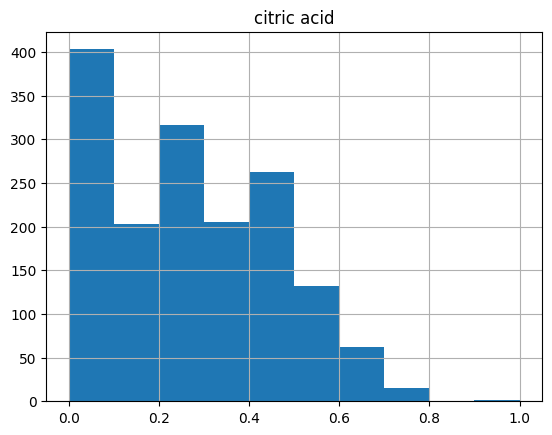

In [19]:
# Histogram

df[['citric acid']].hist()

In [20]:
st.norm.interval(confidence=0.95, loc= df[['density']].mean(), scale = st.sem(df[['density']]))

(array([0.99665417]), array([0.99683919]))

<Axes: >

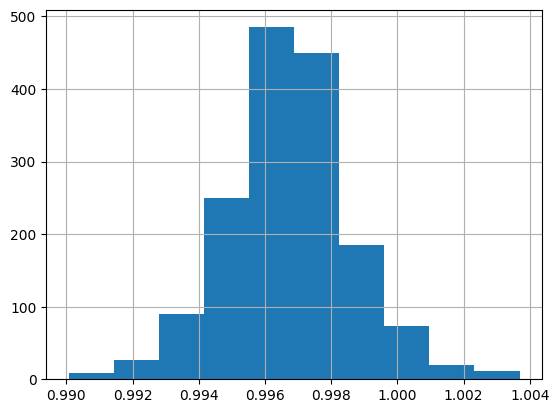

In [21]:
df.density.hist()

#### T-Test

In [22]:
# Helps us understnad whether one group is different from the other

# If p-value is less than 0.05, then the groups are statistically different

data = pd.read_csv('data/stackoverflow.csv')
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
salary_de = data.loc[data.Country == 'Germany'].Salary

In [24]:
stat, p = st.ttest_ind(a = salary_uk, b= salary_de)

In [25]:
print(p)

0.026389999555203502


#### Chi-Square test

In [26]:
# this is for non-continuous variables. Determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies

# null hypothesis: there is no relationship between variables



# cross tabulation

tab = pd.crosstab(index = data.Country, columns=data.Remote)
tab


Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [27]:
chi2,p,dof,exp = st.chi2_contingency(tab)

In [28]:
p

3.321120877301216e-16